***
# An investigation into the life expectancy of smokers:
***

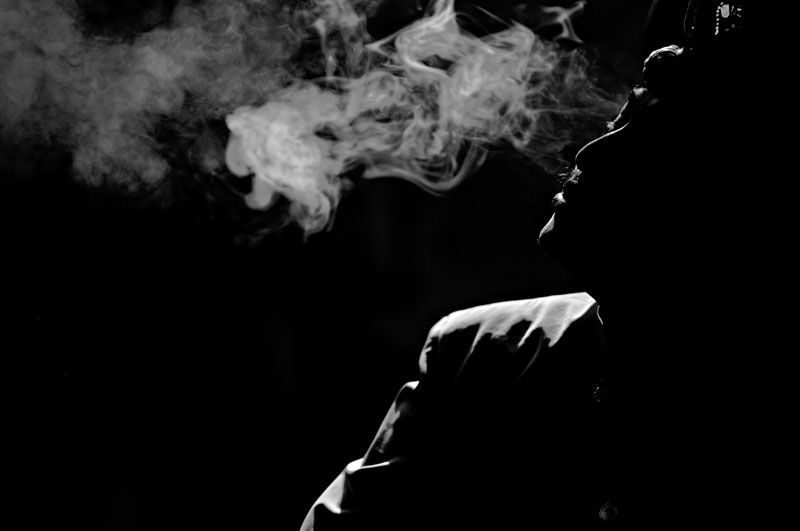

### Aim:

***

The aim of this project is to investigate the habits of smokers and thus the effects of smoking on the national population of smokers in Ireland. The hope is to isolate the factors that most affect the outcome for a given case, and to generate an algorithm that can best emulate a small sample of the real-life population.

***

In [1]:
# Import everything you will need:

import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

rng = np.random.default_rng()

***
### Investigation:
***

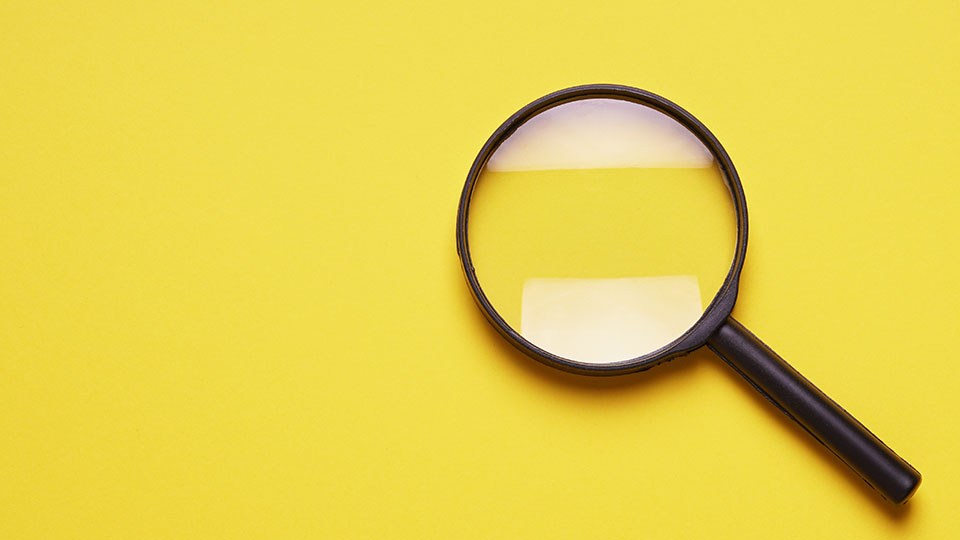

***

Initially I begun my investigation into the matter based upon certain assumptions that I would then either prove right, wrong, or refine.

I decided that the most interesting variable in relation to this data was (1): the life expectancy of a given smoker; thus, the task was to find a way of calculating an estimated life expectancy for a given smoker.

I assumed that the main factors that would affect a smoker’s life expectancy would be (2): Number of cigarettes smoked a day (average), (3): Age that the person started and (4): If they gave up, and if so, at what age.

Firstly, I just needed to gather up as much raw information as I could so as to formulate a better understanding of the effects of smoking on the general population as a whole. What I found was the following information:

Smoking is the second most prevalent cause of death in the world, succeeded only by high blood pressure. [17]

According to ‘Our World in Data’, “Every seventh death in the world (13%) was the result of direct smoking in 2017; a further 2% was the result of second-hand smoke. This means 15% – close to 1-in-6 deaths was the result of tobacco”.

***

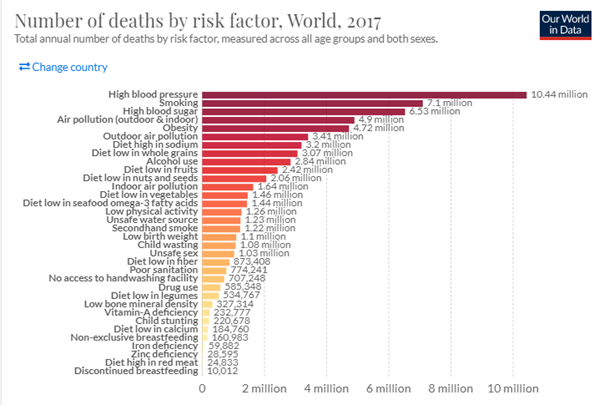

***

With China and Greenland seemingly having the worst rates of deaths from smoking in the world, with almost 1 in 4 deaths being related to smoking. [17]

***

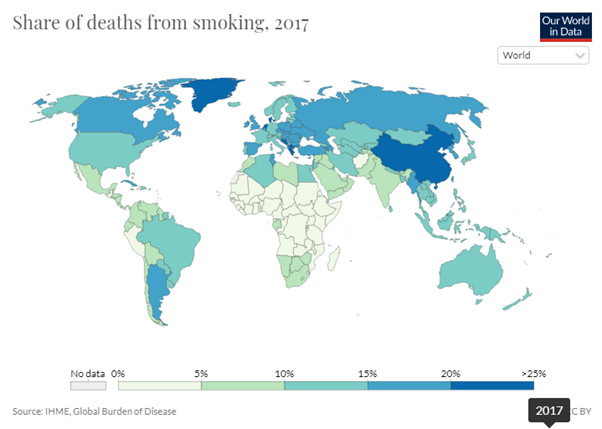

***

Most smoking related deaths affect people in their later years of life:

***

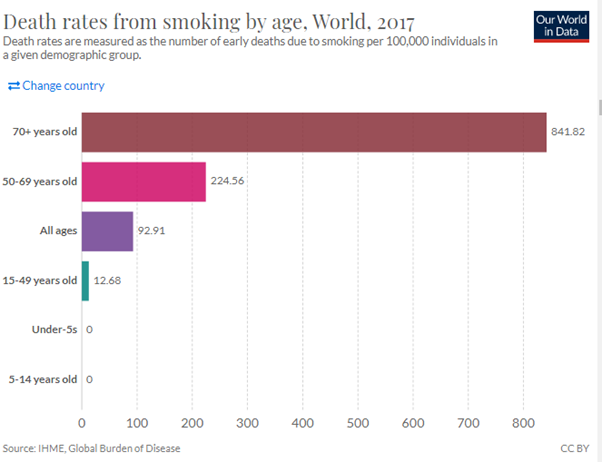

***

And thus, here we are already beginning to see some sort of visualisation of the outcome variable (L) and how it should look if replicated.

***

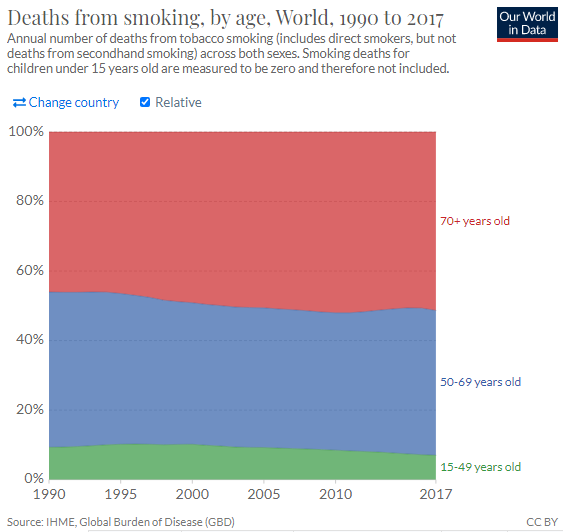

***

Another factor that must be taken into account is gender. According to the same source “more than one-third (35%) of men in the world smoke. Just over 6% of women do.” This will most likely mean that any dataset generated will have to take gender into account as an independent variable, and this variable should reflect the distribution of smoking across both genders.

***

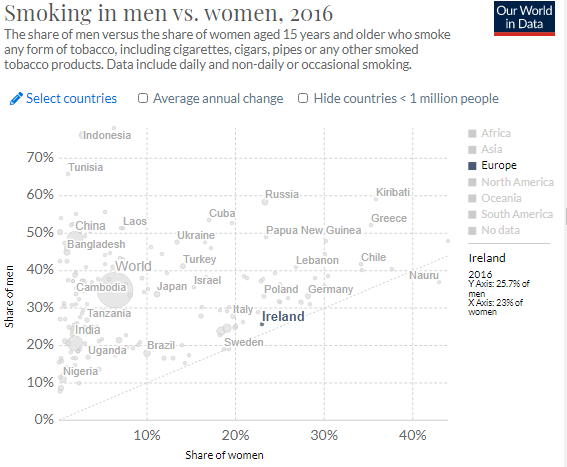

***

However, Ireland seems to be somewhat of an outlier, with women unfortunately achieving the poison chalice of gender equality in their ability to almost match men’s smoking fully, with 54.1% of smokers being male and 45.9% female (According to the HSE) [19]. And so, we have our gender variable distribution (G).

***

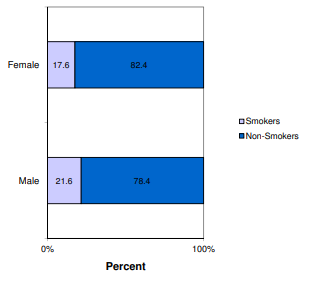

In [2]:
# Average life expectancy of each gender in  Ireland [20]

#Gender
G = np.array(rng.choice(['Male', 'Female'], 100, p=(0.54, 0.46)))
LifeExpectancy = []

# Use append to generate list from loop output [21]
for i in range(100):
    if G[i] == 'Male':
        i = 80.4
    else:
        if G[i] == 'Female':
            i = 84
    LifeExpectancy.append(i)
            
print(LifeExpectancy)
G

[84, 80.4, 84, 80.4, 84, 80.4, 80.4, 84, 80.4, 84, 84, 84, 80.4, 80.4, 80.4, 80.4, 80.4, 80.4, 80.4, 84, 80.4, 80.4, 84, 84, 80.4, 84, 80.4, 80.4, 84, 80.4, 84, 84, 80.4, 80.4, 84, 84, 84, 84, 80.4, 84, 84, 84, 80.4, 84, 80.4, 80.4, 84, 84, 80.4, 80.4, 84, 84, 80.4, 84, 80.4, 80.4, 80.4, 80.4, 84, 84, 84, 80.4, 80.4, 80.4, 84, 84, 80.4, 80.4, 84, 84, 80.4, 80.4, 80.4, 84, 80.4, 80.4, 84, 84, 84, 80.4, 84, 84, 84, 80.4, 84, 84, 84, 80.4, 80.4, 80.4, 84, 80.4, 84, 84, 80.4, 80.4, 80.4, 80.4, 84, 80.4]


array(['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male']

In [3]:
# Convert list to array for CSV later:
np.array(LifeExpectancy)

array([84. , 80.4, 84. , 80.4, 84. , 80.4, 80.4, 84. , 80.4, 84. , 84. ,
       84. , 80.4, 80.4, 80.4, 80.4, 80.4, 80.4, 80.4, 84. , 80.4, 80.4,
       84. , 84. , 80.4, 84. , 80.4, 80.4, 84. , 80.4, 84. , 84. , 80.4,
       80.4, 84. , 84. , 84. , 84. , 80.4, 84. , 84. , 84. , 80.4, 84. ,
       80.4, 80.4, 84. , 84. , 80.4, 80.4, 84. , 84. , 80.4, 84. , 80.4,
       80.4, 80.4, 80.4, 84. , 84. , 84. , 80.4, 80.4, 80.4, 84. , 84. ,
       80.4, 80.4, 84. , 84. , 80.4, 80.4, 80.4, 84. , 80.4, 80.4, 84. ,
       84. , 84. , 80.4, 84. , 84. , 84. , 80.4, 84. , 84. , 84. , 80.4,
       80.4, 80.4, 84. , 80.4, 84. , 84. , 80.4, 80.4, 80.4, 80.4, 84. ,
       80.4])

***

In the same article I was able to find this data, which describes the number of smokers by age. Using this data, we should be able to extract some of the information needed for the other variables’ probability distributions:

***

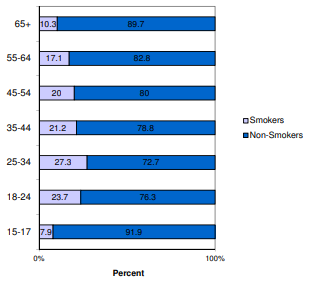

***

For instance, here we can see that people seem to begin smoking between the ages of 15-34, (with the majority starting around 18) with numbers steadily dropping thereafter (Either due to quitting or death). This will allow us to come up with a model for the age a person quit. So, based on the above figure we will have to generate three separate arrays, each representing a portion of the starting ages, with the probability distributed accordingly amongst them. 

So, for the first array: (Ages 25-34): 27.3 – 23.7 = 3.6, (divided by 27.3) X 100 = 13%. 

Second array: (Ages 18 – 24): 23.7-7.9 = 15.8, (divided by 27.3) X 100 = 58%

Third array: (Ages15-17): 100 – (58 + 13) = 29%

We can then concatenate these three arrays to generate a complete array of starting ages that accurately reflects the real-life distribution of starting ages in the Irish population.

***

In [4]:
# Take probability distribution as set by above data and generate
# proportionate amounts of examples from each array, then join together.

a = np.array([15, 16, 17])
b = np.array([18, 19, 20, 21, 22, 23, 24])
c = np.array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

ax = rng.choice(a, size=29)
bx = rng.choice(b, size=58)
cx = rng.choice(c, size=13)

Strt = np.concatenate((ax, bx, cx), axis=0)
Strt

array([15, 15, 16, 16, 17, 17, 17, 16, 16, 17, 17, 15, 15, 15, 16, 17, 16,
       15, 16, 15, 17, 16, 16, 17, 16, 16, 16, 15, 17, 23, 18, 23, 24, 24,
       22, 18, 19, 19, 23, 19, 18, 24, 19, 23, 20, 21, 18, 21, 18, 23, 23,
       21, 21, 24, 19, 23, 18, 23, 18, 20, 19, 18, 24, 20, 19, 24, 23, 19,
       23, 24, 19, 24, 19, 19, 24, 24, 18, 22, 20, 23, 18, 20, 19, 18, 20,
       21, 20, 33, 30, 34, 33, 27, 30, 34, 25, 29, 27, 34, 33, 29])

(array([20., 20., 19.,  7., 21.,  1.,  2.,  4.,  0.,  6.]),
 array([15. , 16.9, 18.8, 20.7, 22.6, 24.5, 26.4, 28.3, 30.2, 32.1, 34. ]),
 <a list of 10 Patch objects>)

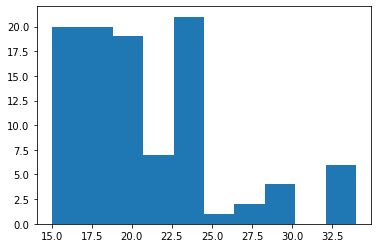

In [5]:
plt.hist(Strt)

***

Thus we have defined our variable (Strt) - Distribution of Ages Started.
***
The next variable to define is the number of cigarettes smoked. According to the HSE the distribution of cigarette smoking is as follows:

***

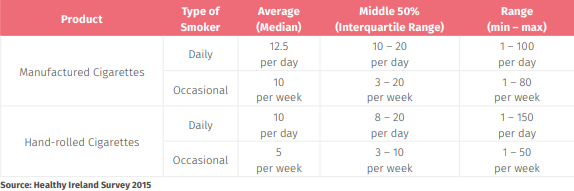

***
With the different types of tobacco smoked as follows:
***

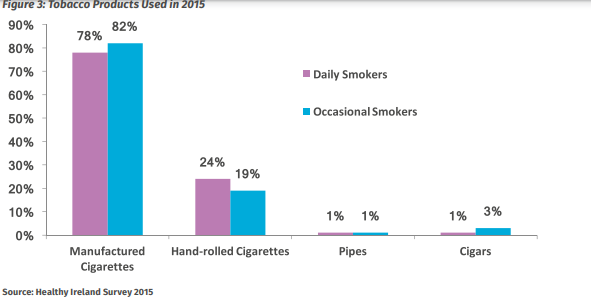

***
Since the difference in effects on health based on type of tobacco product smoked seems to be an area of much debate, I categorise every smoker based on the info of the majority, which is manufactured cigarettes.

Upon experimenting with different distributions based on the information above, the best model I could create to emulate the data using a random number generator was as follows:
***

In [6]:
# take mean as 12.5 and stndard deviation as around half of IQ range:
d = np.random.normal(12.5, 5, 100)

# Turn all negative numbers generated positive:
e = abs(d)
e
np.sort(e)

array([ 0.49908113,  2.18688303,  2.3275825 ,  2.68092628,  3.12780121,
        4.0395048 ,  4.81511022,  4.82502837,  5.04407024,  5.54883881,
        5.74008544,  6.21387793,  6.45825514,  6.85646883,  7.10611589,
        7.27700606,  7.30088264,  7.38085185,  7.78172074,  8.08344025,
        8.1383907 ,  8.1675418 ,  8.29910434,  8.65316728,  8.69598601,
        9.11518752,  9.27084405,  9.53322539,  9.69666019,  9.72920581,
        9.7928085 ,  9.7965463 ,  9.99289124, 10.09494196, 10.46702737,
       10.75875834, 10.88101637, 11.31058785, 11.46767157, 11.55710859,
       11.65159822, 11.8760953 , 11.89746538, 11.92058217, 11.93879864,
       12.25848599, 12.28108947, 12.61936679, 12.64096043, 12.64836388,
       12.72156393, 12.74867467, 12.762149  , 13.23537487, 13.29769404,
       13.48463137, 13.54262612, 13.55062393, 13.57651124, 13.68100097,
       13.74279208, 13.80323467, 14.12696237, 14.22336636, 14.23408714,
       14.32752281, 14.37793573, 14.40481471, 14.53119732, 14.74

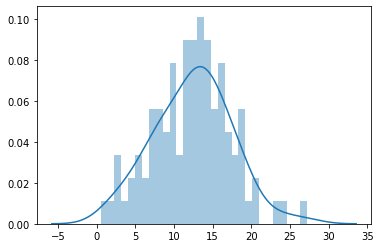

In [7]:
sns.distplot(e, bins=30)

***
Unfortunately, although the curve represents the majority of smokers quite well, I was unable to find a way of defining the range to be 0-100. I recognise that this is a clear limitation to the model, as it will not generate data to represent the few outliers that smoke above 50 cigarettes without skewing the median and warping the distribution to accommodate the minority. I am sure that with a better knowledge of statistics I would be able to fix this, but for now this is as close as I can get to the real-world data for this variable in a single script. However, based on the following data from the HSE:

> -“36% of all smokers were regular smokers (11-20 cigarettes per day), while 59.2% were occasional to light smokers (10 or less cigarettes per day) with 4.8% being heavy smokers (21+ cigarettes per day)”. [19]

I will assume that the 4.8% of heavy smokers can be represented on a uniform distribution. One thing I can do to compensate for this minority is to take the number of sample smokers generated by the above script and reduce it by 5 (4.8 rounded up) and generate an evenly distributed array of numbers between 21-100 to represent the heavy smokers minority portion.
***

In [8]:
# mid to low level smokers:
d = np.random.normal(12.5, 5, 95)
e = abs(d)

# Heavy smokers:
f = np.random.uniform(21, 100, 5)

# Join arrays to get variable Num: Number of cigarettes
Num1 = np.concatenate((e, f), axis=0)
Num = np.array(Num1)

# View in order for convenience:
np.sort(Num)

array([ 1.1771901 ,  1.43143987,  1.66517682,  2.12270847,  2.49816054,
        2.70133658,  3.69915324,  4.25966636,  4.49127811,  4.60675808,
        4.77275128,  5.00268599,  5.01249261,  5.24351487,  5.92292584,
        6.03696671,  7.50369352,  7.56728989,  7.87807208,  8.05190597,
        8.22114213,  8.27575696,  8.60778523,  8.9788057 ,  9.11954004,
        9.5543138 ,  9.60413815,  9.67554093,  9.73559735, 10.21076178,
       10.22051496, 10.36530575, 10.5557743 , 10.66617456, 10.7788318 ,
       10.88855383, 10.94738508, 11.08276624, 11.11708385, 11.39997808,
       11.41447708, 11.48374231, 11.54386316, 11.70276891, 12.04215103,
       12.13723066, 12.16215421, 12.28311091, 12.3373852 , 12.33968758,
       12.380762  , 12.48118441, 12.59820051, 12.81382905, 12.87585162,
       13.04854899, 13.10466371, 13.28750196, 13.39567312, 13.40246462,
       13.59309418, 13.90515396, 13.97086845, 14.10417451, 14.10842784,
       14.43051812, 14.53121477, 14.62846772, 14.64304278, 14.73

In [9]:
Num

array([ 9.73559735, 17.78300179, 12.33968758, 11.08276624,  8.27575696,
       15.91092709,  5.01249261,  7.50369352,  2.49816054, 10.21076178,
        8.22114213, 12.3373852 , 15.09550569, 11.70276891, 12.28311091,
       20.27907872, 14.10417451, 13.04854899, 13.40246462, 13.90515396,
       10.88855383, 12.16215421,  9.5543138 , 12.380762  , 20.30450453,
        4.60675808,  2.12270847,  1.1771901 ,  7.56728989, 15.69811813,
       16.85399814, 13.39567312,  9.11954004,  2.70133658, 18.65484054,
       11.54386316, 16.0934239 , 14.73536257, 10.66617456, 12.04215103,
       12.13723066, 12.59820051, 12.48118441,  8.60778523, 10.7788318 ,
       17.54528619, 18.38167435, 21.81977544, 13.59309418,  4.77275128,
        4.49127811, 17.11601717, 14.97513904,  9.67554093,  8.05190597,
       14.10842784, 13.97086845, 13.10466371, 10.5557743 , 11.11708385,
       18.64942245,  1.66517682,  3.69915324, 11.39997808, 16.98550796,
        1.43143987, 19.08097925,  8.9788057 ,  6.03696671, 15.81

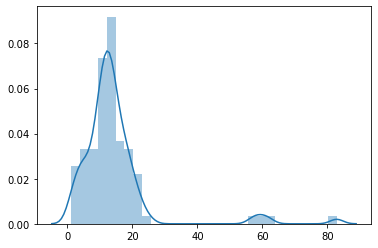

In [10]:
# Show new variable with added outliers at higher extremes:
sns.distplot(Num, bins=30)

***
After a long period of research and deliberation, I decided it was best to base the effects of this variable on an algorithm derived from a number of other studies that were brought together by the NCBI to calculate an average loss of life of 11 minutes per cigarette. [1] [2] [3] [4] [5] [6] [7] [8] [9]

There are 525,600 minutes in a year.

1 cigarette a day, at a loss of 11 minutes a day, amounts to 4,004 minutes a year. 

Multiply the number of cigarettes smoked in a day by 4004 and divide that number by 525,600 and you get the percentage of each year that is lost -PerYr.

if we take the age they started, subtract it from the national average:
>New data from the Department of Health reveals that the average life expectancy in Ireland is now 84 years for women and 80.4 years for men. [20]

...We get YrsSmkr, and then calculate the total time lost across all years we get the expected amount of time lost from smoking.

PerYr * YrsSmkr =  Time lost.

If we subtract this result from the national average according to their gender we should get an average age for someone with this specific smoking habit to die.
***

In [11]:
PerYr = np.array((Num * 4004) / 525600)
PerYr

array([0.0741654 , 0.1354702 , 0.09400325, 0.08442807, 0.06304439,
       0.12120881, 0.03818497, 0.05716284, 0.01903089, 0.07778518,
       0.06262834, 0.09398571, 0.11499696, 0.08915123, 0.09357225,
       0.15448522, 0.10744504, 0.09940333, 0.10209945, 0.10592891,
       0.08294857, 0.09265081, 0.07278438, 0.09431615, 0.15467891,
       0.0350941 , 0.01617071, 0.00896779, 0.05764731, 0.11958764,
       0.12839309, 0.10204771, 0.0694723 , 0.02057868, 0.14211184,
       0.08794069, 0.12259907, 0.11225341, 0.0812545 , 0.09173663,
       0.09246094, 0.09597259, 0.09508117, 0.06557377, 0.08211271,
       0.1336593 , 0.14003087, 0.16622219, 0.10355165, 0.03635863,
       0.03421438, 0.13038914, 0.11408002, 0.07370789, 0.0613391 ,
       0.10747744, 0.10642952, 0.09983081, 0.08041347, 0.0846895 ,
       0.14207056, 0.01268525, 0.02818   , 0.08684458, 0.12939493,
       0.01090465, 0.14535814, 0.06840019, 0.04598937, 0.12048222,
       0.13628162, 0.07785948, 0.10122366, 0.06001484, 0.11588

***
The next variable is whether people gave up, and if so at what age? According to CDC.Gov:
>-“ In 2018, 61.7% of adult smokers (55.0 million adults) who ever smoked had quit.”

And according to this study [16] there is an average reduction of life loss depending on the age you give up:
>-“Cessation at age 60, 50, 40, or 30 years gained, respectively, about 3, 6, 9, or 10 years of life expectancy.”

Thus we can create a categorical approach to this variable. 62% chance of yes, the person gave up, and if so randomly generate an age from list (30, 40, 50, 60) with respective reductions of the overall loss of life applied to the result accordingly, otherwise it has no efect.
***

In [12]:
# Create arrays for age Quit and years saved:
# Thirty = 10
# Forty = 9
#  = 6
#  = 3

# 62% who quit:
j = rng.choice((30, 40, 50, 60), 62)

# 38% WHo did not:
k = np.zeros(38)

# Join two sets together:
Quit = np.concatenate((j, k), axis=0)

# Create array for Age Quit:
QuitAge = np.array(Quit)



# Create an empty list for years saved:
YrsSaved = []

# populate - Works well because both lists remain ordered relative to the other.
for q in range(100):
    if QuitAge[q] == 30:
        q = 10
    if QuitAge[q] == 40:
        q = 9
    if QuitAge[q] == 50:
        q = 6
    if QuitAge[q] == 60:
        q = 3
    if QuitAge[q] == 0:
        q = 0
    YrsSaved.append(q)

np.array(YrsSaved)

array([3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 6, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3,
       6, 6, 3, 3, 6, 6, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 6, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# As we cansee, the age orders line up perfectly, making a cohesive pair of arrays.
QuitAge

array([40., 40., 40., 60., 30., 30., 30., 50., 50., 60., 40., 50., 50.,
       40., 60., 40., 30., 60., 60., 60., 50., 60., 30., 60., 50., 40.,
       60., 50., 40., 60., 60., 30., 30., 40., 60., 60., 40., 60., 50.,
       40., 60., 60., 30., 60., 50., 50., 30., 60., 50., 50., 30., 50.,
       40., 30., 50., 60., 30., 60., 30., 30., 50., 40.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])


***
So we have come to find a model to calculate a persons estimated life expectancy:


Actual Life expectancy = ((Average Life Expectancy - Strt) * PerYr) + YrsSaved
***

In [14]:
# Calculate the difference:

M = (LifeExpectancy - Strt)
YearsLost = ((M * PerYr) + YrsSaved)
YearsLost

array([ 8.11741228, 11.85975133,  9.39222111,  8.43716801,  7.22397406,
       10.68463874,  5.42092712,  9.88707314,  7.22558919,  8.211607  ,
        7.19609847, 12.48501414, 13.52080151,  8.83049047,  9.02605308,
       12.7943629 ,  9.91946079,  9.50097777,  9.57520426, 10.30909497,
       11.25893948,  8.96671213,  7.94933814,  9.31918238, 15.96132193,
        5.38639885,  4.04139367,  6.58649331,  6.8623701 ,  9.86433069,
       11.473944  ,  9.22491017,  6.91823744,  4.16063728, 11.81093389,
        8.80408572, 10.96893931, 10.29647158, 10.66400805,  8.96288095,
        9.10242223,  8.75835557,  8.83798377,  6.9999998 , 10.95960793,
       13.93936217, 12.24203727, 13.4719977 , 12.46162318,  8.08698539,
        5.08707711, 14.21451591,  9.77635298,  7.42247327,  9.76622081,
        9.16920534,  9.64120224,  8.73028847,  8.30728908,  8.42012831,
       15.23458654,  3.79155967,  1.58935217,  5.24541274,  8.41067029,
        0.65427914,  8.34355751,  4.19977145,  2.80535178,  7.22

In [15]:
ActualLifeExpectancy = (LifeExpectancy - YearsLost)
ActualLifeExpectancy

array([75.88258772, 68.54024867, 74.60777889, 71.96283199, 76.77602594,
       69.71536126, 74.97907288, 74.11292686, 73.17441081, 75.788393  ,
       76.80390153, 71.51498586, 66.87919849, 71.56950953, 71.37394692,
       67.6056371 , 70.48053921, 70.89902223, 70.82479574, 73.69090503,
       69.14106052, 71.43328787, 76.05066186, 74.68081762, 64.43867807,
       78.61360115, 76.35860633, 73.81350669, 77.1376299 , 70.53566931,
       72.526056  , 74.77508983, 73.48176256, 76.23936272, 72.18906611,
       75.19591428, 73.03106069, 73.70352842, 69.73599195, 75.03711905,
       74.89757777, 75.24164443, 71.56201623, 77.0000002 , 69.44039207,
       66.46063783, 71.75796273, 70.5280023 , 67.93837682, 72.31301461,
       78.91292289, 69.78548409, 70.62364702, 76.57752673, 70.63377919,
       71.23079466, 70.75879776, 71.66971153, 75.69271092, 75.57987169,
       68.76541346, 76.60844033, 78.81064783, 75.15458726, 75.58932971,
       83.34572086, 72.05644249, 76.20022855, 81.19464822, 76.77

In [16]:
raw_data = {'Gender': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male'], 
'Avg Life Expectancy': [80.4, 80.4, 80.4, 84. , 84. , 84. , 84. , 84. , 80.4, 80.4, 84. ,
       80.4, 80.4, 80.4, 80.4, 80.4, 84. , 84. , 80.4, 80.4, 84. , 80.4,
       84. , 80.4, 80.4, 80.4, 84. , 80.4, 80.4, 80.4, 80.4, 80.4, 84. ,
       80.4, 84. , 84. , 80.4, 80.4, 84. , 80.4, 80.4, 84. , 80.4, 84. ,
       84. , 80.4, 80.4, 84. , 84. , 84. , 84. , 84. , 80.4, 84. , 80.4,
       80.4, 84. , 80.4, 80.4, 80.4, 84. , 80.4, 80.4, 84. , 80.4, 84. ,
       84. , 84. , 84. , 84. , 84. , 84. , 84. , 80.4, 84. , 80.4, 80.4,
       80.4, 80.4, 84. , 84. , 80.4, 84. , 84. , 84. , 80.4, 84. , 84. ,
       84. , 84. , 84. , 80.4, 80.4, 80.4, 80.4, 80.4, 80.4, 84. , 84. ,
       80.4], 'Age Started': [16, 15, 16, 15, 17, 16, 15, 15, 17, 15, 15, 15, 15, 17, 16, 17, 17,
       17, 15, 16, 15, 15, 15, 17, 17, 15, 17, 16, 15, 19, 21, 21, 23, 20,
       22, 20, 19, 24, 19, 18, 19, 24, 21, 21, 21, 24, 18, 18, 21, 23, 18,
       19, 18, 21, 22, 22, 24, 22, 18, 24, 23, 19, 20, 24, 18, 19, 22, 20,
       23, 21, 19, 19, 20, 20, 21, 21, 20, 20, 20, 19, 23, 19, 21, 24, 20,
       20, 20, 29, 30, 28, 33, 31, 26, 25, 26, 34, 31, 29, 34, 26], 
            'Daily No. Cigarettes': [15.50730965, 25.91520761, 15.96153542,  4.52711429, 18.5002562 ,
        1.89992496,  2.5772016 , 14.42105564,  3.81970863, 13.84235496,
        9.36301315, 11.80386487, 10.32782979, 16.56122952, 14.69145183,
        9.66320729, 16.2700941 ,  6.5951142 ,  8.16535148,  9.04703618,
       12.10600709,  2.84311935, 15.24564017, 19.61027659, 14.6912682 ,
       17.32966606, 11.93280235,  8.3553349 , 11.27340683, 12.40810667,
       11.07533328,  8.84831532, 10.27733593, 14.36946458, 17.95342572,
       15.53175577, 11.5363431 , 12.89727272,  9.31801588,  2.5900817 ,
       18.86916969,  6.60032942,  9.54451505,  6.80012659, 16.87311959,
       16.97793148, 13.64695058, 14.07873077,  5.05371387, 13.34442767,
       17.87895006,  8.26173307,  8.70775382, 10.14084112, 19.87342286,
        7.34260384,  7.30743563, 12.24551248,  5.73828067, 20.7603262 ,
        3.2249692 ,  7.4388922 , 22.24390176, 24.11886235, 11.32568312,
       10.24813106, 15.71312461, 10.14673109, 12.11976622,  9.56054828,
        9.06749231, 13.61119379,  4.80890563,  1.05591334, 22.53101025,
       11.24139793, 11.37161923, 16.21740293, 15.91387277, 17.09039155,
       18.69656092,  5.46996908,  8.58595003, 23.53688345,  5.31473399,
       10.65662926, 17.14648508, 12.91748893, 12.86544788, 10.86500645,
       13.82788169, 17.16201316,  9.94722574, 21.32231028, 11.42351782,
       83.89062083, 81.27643202, 59.7322848 , 49.80757534, 54.38119065 ], 
            '% Year lost': [0.11813407, 0.19742103, 0.12159435, 0.03448738, 0.14093422,
       0.01447355, 0.01963302, 0.10985903, 0.02909839, 0.10545051,
       0.07132706, 0.08992138, 0.078677  , 0.12616279, 0.1119189 ,
       0.07361393, 0.12394493, 0.05024132, 0.06220332, 0.06891996,
       0.09222308, 0.02165877, 0.11614068, 0.14939031, 0.1119175 ,
       0.13201671, 0.09090362, 0.06365061, 0.08588037, 0.09452447,
       0.08437145, 0.06740612, 0.07829234, 0.10946601, 0.13676849,
       0.1183203 , 0.08788341, 0.09825091, 0.07098428, 0.01973114,
       0.14374459, 0.05028105, 0.07270974, 0.0518031 , 0.12853876,
       0.12933721, 0.10396193, 0.10725121, 0.03849899, 0.10165732,
       0.13620113, 0.06293756, 0.06633532, 0.07725253, 0.15139495,
       0.05593567, 0.05566776, 0.09328583, 0.043714  , 0.15815134,
       0.02456769, 0.05666919, 0.16945316, 0.18373654, 0.08627861,
       0.07806986, 0.11970196, 0.0772974 , 0.0923279 , 0.07283188,
       0.0690758 , 0.10368954, 0.03663405, 0.00804391, 0.17164034,
       0.08563652, 0.08662855, 0.12354353, 0.12123125, 0.13019393,
       0.14242966, 0.04167001, 0.06540743, 0.17930305, 0.04048743,
       0.08118178, 0.13062124, 0.09840492, 0.09800847, 0.08276919,
       0.10534026, 0.13073954, 0.07577757, 0.16243252, 0.08702391,
       0.63907543, 0.61916064, 0.45503818, 0.37943214, 0.41427376], 
            'Age Person Quit': [60., 40., 30., 60., 30., 50., 60., 30., 40., 30., 30., 60., 60.,
       30., 30., 50., 50., 30., 60., 60., 60., 50., 60., 30., 50., 30.,
       40., 60., 50., 50., 50., 30., 60., 50., 40., 50., 50., 30., 30.,
       50., 50., 30., 60., 60., 60., 50., 30., 30., 60., 40., 60., 30.,
       30., 30., 30., 30., 40., 40., 50., 30., 40., 40.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
            'Years Reclaimed': [ 3,  9, 10,  3, 10,  3,  3, 10,  9, 10, 10,  3,  3, 10, 10,  3,  3,
       10,  3,  3,  3,  3,  3, 10,  3, 10,  9,  3,  3,  3,  3, 10,  3,  3,
        9,  3,  3, 10, 10,  3,  3, 10,  3,  3,  3,  3, 10, 10,  3,  9,  3,
       10, 10, 10, 10, 10,  9,  9,  3, 10,  9,  9,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], 'Total Loss': [10.60783419, 21.9113351 , 17.83067583,  5.37962905, 19.44259272,
        3.98420161,  4.35467837, 17.58027315, 10.84483787, 16.89646351,
       14.92156739,  8.88085795,  8.14547571, 17.99872096, 17.20757707,
        7.66712321, 11.30431051, 13.36616837,  7.06809742,  7.43844566,
        9.36339272,  4.41648361, 11.01370716, 19.47134572, 10.09556949,
       18.63389285, 15.09054228,  7.09909932,  8.61657601,  8.80380219,
        8.01166417, 14.00392329,  7.77583264,  9.61174716, 17.47964617,
       10.57249925,  8.39604108, 15.5413515 , 14.61397796,  4.23122313,
       11.8259177 , 13.0168629 ,  7.31895844,  6.263595  , 11.09794171,
       10.29461865, 16.4872244 , 17.07858011,  5.42543651, 15.20109664,
       11.98927484, 14.09094111, 14.13932422, 14.86690916, 18.84146501,
       13.26664286, 12.34006532, 14.44789244,  5.72775329, 18.91973577,
       10.49862895, 12.47948805, 10.23497106, 11.02419234,  5.383785  ,
        5.07454069,  7.42152161,  4.94703334,  5.63200187,  4.58840834,
        4.48992684,  6.73981982,  2.34457938,  0.48585192, 10.8133417 ,
        5.08680956,  5.23236413,  7.46202944,  7.32236768,  8.46260522,
        8.68820933,  2.55853849,  4.12066793, 10.7581828 ,  2.59119573,
        4.90337951,  8.35975967,  5.41227057,  5.29245753,  4.63507459,
        5.37235303,  6.45853313,  4.12229992,  8.99876138,  4.73410052,
       29.65309993, 30.58653575, 25.0271    , 18.97160689, 22.53649245], 
            'Actual Life Expectancy': [69.79216581, 58.4886649 , 62.56932417, 78.62037095, 64.55740728,
       80.01579839, 79.64532163, 66.41972685, 69.55516213, 63.50353649,
       69.07843261, 71.51914205, 72.25452429, 62.40127904, 63.19242293,
       72.73287679, 72.69568949, 70.63383163, 73.33190258, 72.96155434,
       74.63660728, 75.98351639, 72.98629284, 60.92865428, 70.30443051,
       61.76610715, 68.90945772, 73.30090068, 71.78342399, 71.59619781,
       72.38833583, 66.39607671, 76.22416736, 70.78825284, 66.52035383,
       73.42750075, 72.00395892, 64.8586485 , 69.38602204, 76.16877687,
       68.5740823 , 70.9831371 , 73.08104156, 77.736405  , 72.90205829,
       70.10538135, 63.9127756 , 66.92141989, 78.57456349, 68.79890336,
       72.01072516, 69.90905889, 66.26067578, 69.13309084, 61.55853499,
       67.13335714, 71.65993468, 65.95210756, 74.67224671, 61.48026423,
       73.50137105, 67.92051195, 70.16502894, 72.97580766, 75.016215  ,
       78.92545931, 76.57847839, 79.05296666, 78.36799813, 79.41159166,
       79.51007316, 77.26018018, 81.65542062, 79.91414808, 73.1866583 ,
       75.31319044, 75.16763587, 72.93797056, 73.07763232, 75.53739478,
       75.31179067, 77.84146151, 79.87933207, 73.2418172 , 81.40880427,
       75.49662049, 75.64024033, 78.58772943, 78.70754247, 79.36492541,
       78.62764697, 73.94146687, 76.27770008, 71.40123862, 75.66589948,
       50.74690007, 49.81346425, 58.9729    , 65.02839311, 57.86350755]}

In [17]:
df = pd.DataFrame(raw_data, columns = ['Gender', 'Avg Life Expectancy', 'Age Started',
                                       'Daily No. Cigarettes', '% Year lost', 'Age Person Quit', 
                                      'Years Reclaimed', 'Total Loss', 'Actual Life Expectancy'])

In [18]:
df.to_csv("/users/codes/repo/ProjectPFDA/data.csv")

In [19]:
df

,Gender,Avg Life Expectancy,Age Started,Daily No. Cigarettes,% Year lost,Age Person Quit,Years Reclaimed,Total Loss,Actual Life Expectancy
0,Male,80.4,16,15.507310,0.118134,60.0,3,10.607834,69.792166
1,Male,80.4,15,25.915208,0.197421,40.0,9,21.911335,58.488665
2,Male,80.4,16,15.961535,0.121594,30.0,10,17.830676,62.569324
3,Female,84.0,15,4.527114,0.034487,60.0,3,5.379629,78.620371
4,Female,84.0,17,18.500256,0.140934,30.0,10,19.442593,64.557407
...,...,...,...,...,...,...,...,...,...
95,Male,80.4,34,83.890621,0.639075,0.0,0,29.653100,50.746900
96,Male,80.4,31,81.276432,0.619161,0.0,0,30.586536,49.813464
97,Female,84.0,29,59.732285,0.455038,0.0,0,25.027100,58.972900
98,Female,84.0,34,49.807575,0.379432,0.0,0,18.971607,65.028393


In [23]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

C:\Users\codes\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\codes\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


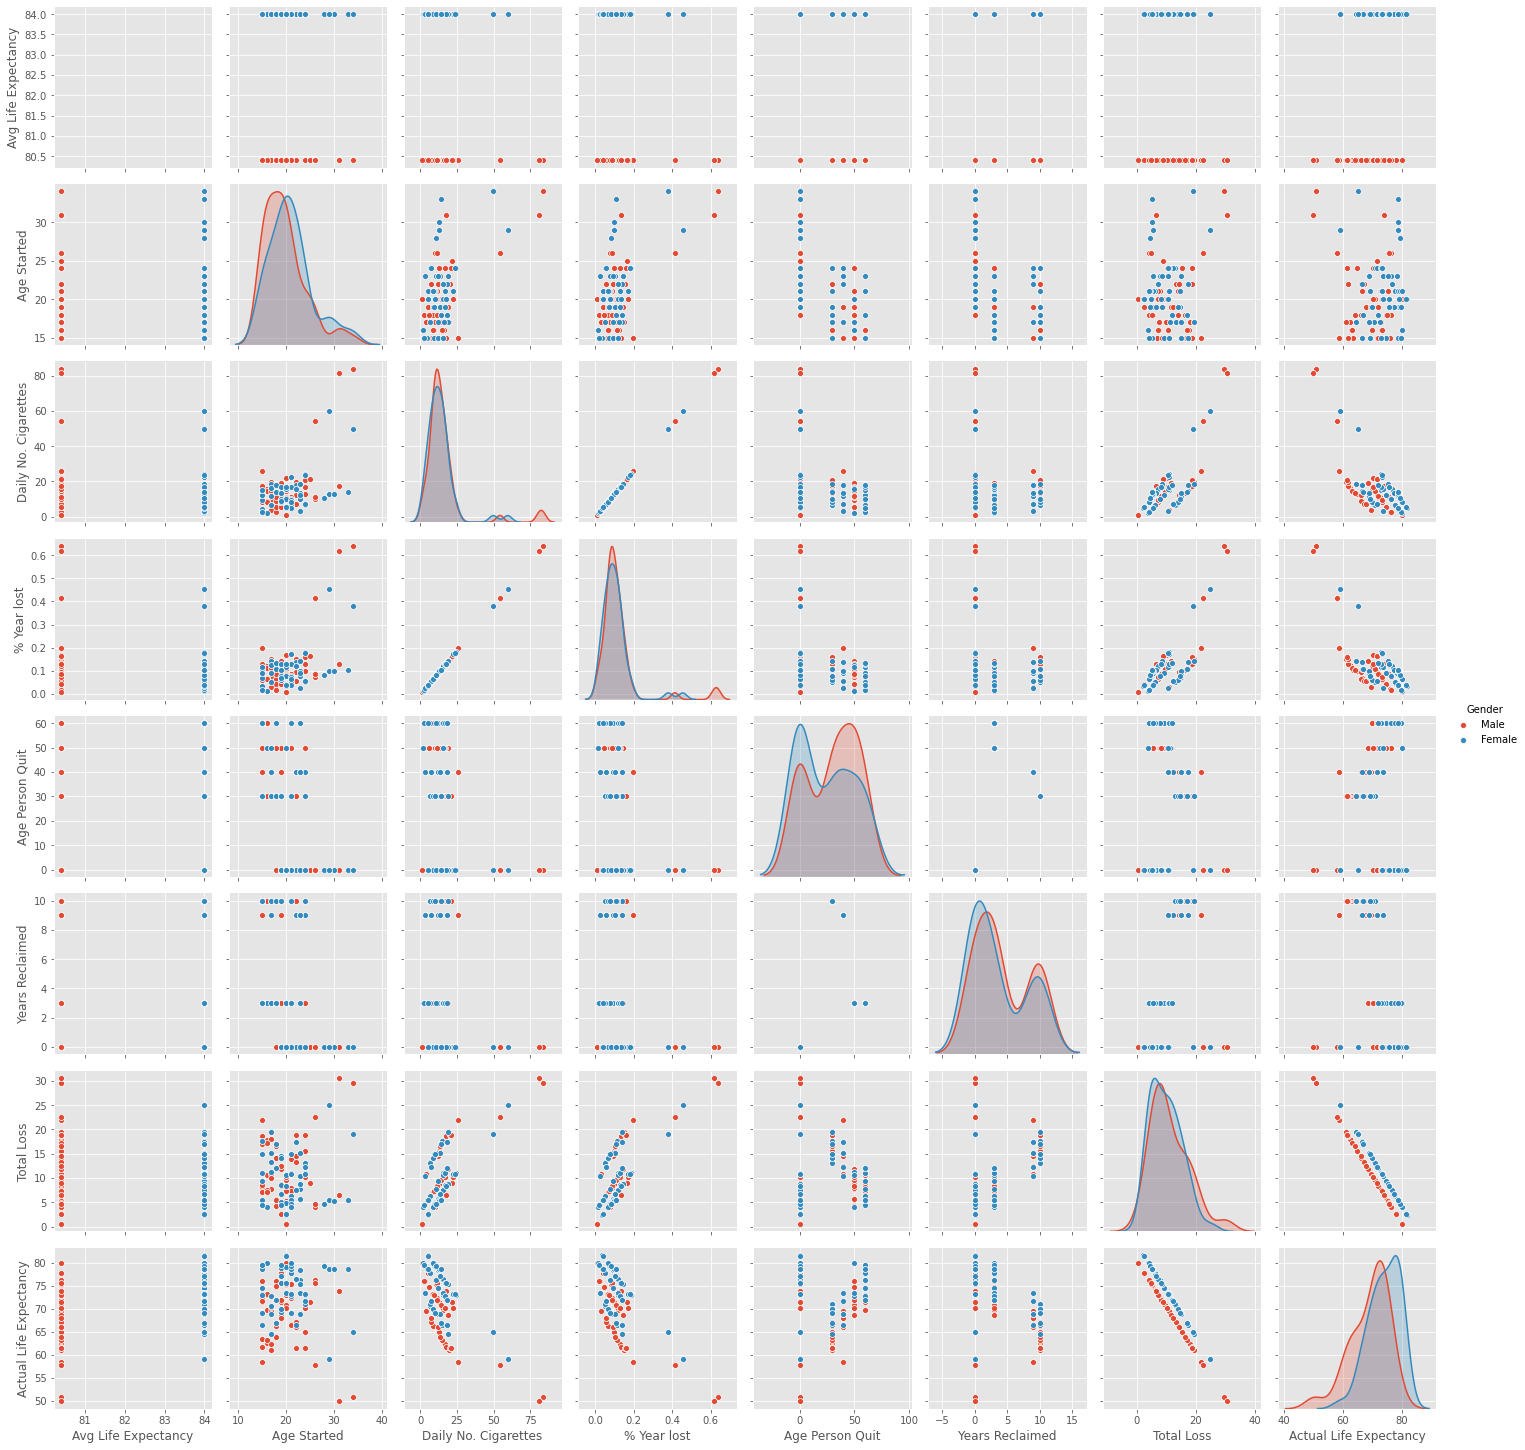

In [25]:
sns.pairplot(df, hue='Gender')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  3.,  4.,  8.,
        10.,  7.,  5.,  7.,  9., 12., 10.,  1.,  8.,  1.,  2.,  2.,  1.,
         1.]),
 array([47.96541108, 48.84991882, 49.73442657, 50.61893431, 51.50344206,
        52.3879498 , 53.27245755, 54.15696529, 55.04147304, 55.92598078,
        56.81048853, 57.69499627, 58.57950402, 59.46401176, 60.3485195 ,
        61.23302725, 62.11753499, 63.00204274, 63.88655048, 64.77105823,
        65.65556597, 66.54007372, 67.42458146, 68.30908921, 69.19359695,
        70.07810469, 70.96261244, 71.84712018, 72.73162793, 73.61613567,
        74.50064342, 75.38515116, 76.26965891, 77.15416665, 78.0386744 ,
        78.92318214, 79.80768989, 80.69219763, 81.57670537, 82.46121312,
        83.34572086]),
 <a list of 40 Patch objects>)

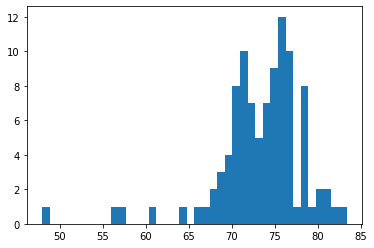

In [21]:
# Finally, verify simulated data with real data:

plt.hist(ActualLifeExpectancy, bins=40)

***
Which as desired has a very similar distribution to the real world data-set seen before:
***

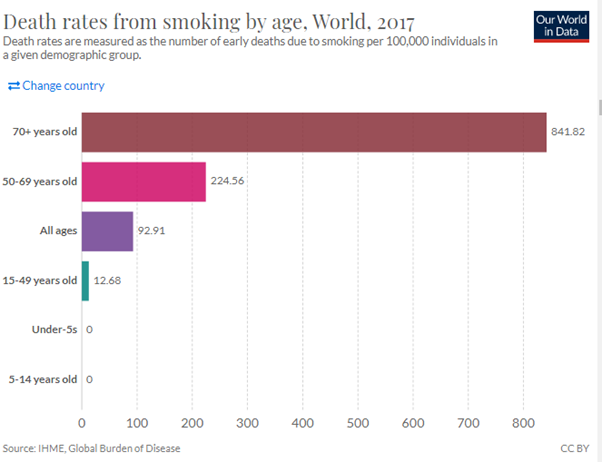

***
## Conclusion:
***

In conclusion; there is what is probably an obvious corelation between certain variables and the shortening of a smoker’s life, such as the more cigarettes they smoke and the earlier they start the more likely they are to die younger. The extent of the effects, however, are rather eye opening when you can see the age that someone should be expecting to die based on their habits. A clear point where every year afterwards means you are ‘’getting away with it’’ or are “living off luck” may serve to further incentivise a smoker to consider giving up.

One variable I found very interesting was the effect of giving up. If a person was to give up early enough, most studies would strike them from the record of the study as they were considered to be essentially almost as low risk as non-smokers. This could serve as another incentive for a person to consider changing their smoking habits.

All in all, the data is rather straightforward once it is all put together, and is essentially just telling people the more cigarettes you smoke the more damage you do. Nothing new there. The actual concrete extent of that damage is rarely put in front of us though, and as a result I think that the idea of consequences down the line can be abstracted from reason and ignored. Seeing the age you should expect to die, on the other hand, is a chilling beacon that is much more difficult to ignore, thus proving that the visualisation and combining of data can be a powerful thing, even in fields where we already know quite a bit.

A few other factors were not fully accounted for, such as the difference between if the person were a continuous smoker or if they spent periods on and off, or if they are a very ligh, occasional smoker. In these cases I may not have fully accounted for these individuals, however their set is suprisingly close to non-smokers, and as a result I focused soley on smokers who had smoked constantly until they either gave up permanently or until they died.

***

### Bibliography:
***

[1]: Blueprintincome.com: How long will I live Calculator: https://www.blueprintincome.com/tools/life-expectancy-calculator-how-long-will-i-live/info/smoking]

[2]: CBS.nl: Heavy smokers cut their lifespan by 13 years on average: https://www.cbs.nl/en-gb/news/2017/37/heavy-smokers-cut-their-lifespan-by-13-years-on-average#:~:text=This%20is%2011%20percent%20among,intermittent)%20smokers%20lose%205%20years.

[3]: Tobaccocontrol.bmj.com: Health consequences of smoking 1-4 per day: https://tobaccocontrol.bmj.com/content/14/5/315

[4]: CDC.gov: Smoking and Tobacco use: https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/tobacco_related_mortality/index.htm

[5]: HSE.ie: Smoking the facts: https://www.hse.ie/eng/about/who/tobaccocontrol/kf/

[6]:NCBI: Time for a smoke? One cigarette reduces your life by 11 minutes: Mary Shaw, Economic and Social Research Council research fellow, Richard Mitchell, research fellow, Danny Dorling, reader: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1117323/

[7]: Life expectancy in men who have never smoked and those who have smoked continuously: 15 year follow up of large cohort of middle-aged British men: https://pubmed.ncbi.nlm.nih.gov/8876091/

[8]: NCBI.nlm.nih.gov: Mortality in relation to smoking: 40 years' observations on male British doctors. Doll R, Peto R, Wheatley K, Gray R, Sutherland I BMJ. 1994 Oct 8; 309(6959):901-11: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2541142/

[9]: Phillips AN, Wannamethee SG, Walker M, Thomson A, Smith GD. Life expectancy in men who have never smoked and those who have smoked continuously: 15 year follow up of large cohort of middle aged British men. BMJ. 1996 Oct 12;313(7062):907-8. doi: 10.1136/bmj.313.7062.907. PMID: 8876091; PMCID: PMC2352232. 

[10]: https://www.cdc.gov/: Percent of men aged 18 and over who currently smoke cigarettes: 15.7%: https://www.cdc.gov/nchs/fastats/mens-health.htm

[11]:  Clennell S, Kuh D, Guralnik JM, Patel KV, Mishra GD. Characterisation of smoking behaviour across the life course and its impact on decline in lung function and all-cause mortality: evidence from a British birth cohort. J Epidemiol Community Health. 2008 Dec;62(12):1051-6. doi: 10.1136/jech.2007.068312. Epub 2008 May 1. PMID: 18450766; PMCID: PMC2774042.

[12]:  The percentage* of current smokers from age 20 years in 1966 to age 53 years in the NSHD cohort (n = 1845). J Epidemiol Community Health. 2008 Dec; 62(12): 1051–1056. Published online 

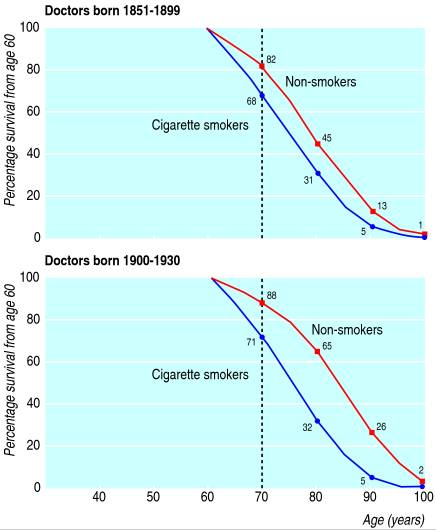

[13]:  Kaplan–Meier estimates of the proportion of cohort members who are still alive by the smoking trajectories (n = 3286).

[14]:  Kaplan–Meier estimates of the proportion of cohort members who are still alive by the smoking trajectories (n = 3286): J Epidemiol Community Health. 2008 Dec; 62(12): 1051–1056. Published online 2008 May1. Doi: 10.1136/jech.2007.068312: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2774042/figure/HZT-62-12-1051-f02


[15]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2598568/#:~:text=On%20average%2C%20respondents%20in%20this,reported%20average%20duration%3A%2016.7).

[16]: Doll R, Peto R, Boreham J, Sutherland I. Mortality in relation to smoking: 50 years' observations on male British doctors. BMJ. 2004 Jun 26;328(7455):1519. doi: 10.1136/bmj.38142.554479.AE. Epub 2004 Jun 22. PMID: 15213107; PMCID: PMC437139. https://pubmed.ncbi.nlm.nih.gov/15213107/


[17] Smoking: by Hannah Ritchie and Max Roser
https://ourworldindata.org/smoking#:~:text=Cigarette%20consumption%20per%20smoker,-The%20extent%20of&text=Across%20much%20of%20Asia%2C%20Eastern,to%2025%20cigarettes%20per%20day.

[18]:https://www.hse.ie/eng/about/who/tobaccocontrol/tobaccofreeireland/adult-smoking-in-ireland.pdf

[19] https://www.hse.ie/eng/about/who/tobaccocontrol/research/smokinginireland2014.pdf
-36% of all smokers were regular smokers (11-20 cigarettes per day), while 59.2% were occasional to light smokers (10 or less cigarettes per day) with 4.8% being heavy smokers (21+ cigarettes per day).

-54.1% of smokers are male with 45.9% female.
- On average 12.71 cigarettes are smoked per day.

[20] New data from the Department of Health reveals that the average life expectancy in Ireland is now 84 years for women and 80.4 years for men.
	https://www.thejournal.ie/life-expectancy-ireland-2019-4947423-Dec2019/

[21] How to populate a list with for loop in Python
https://www.youtube.com/watch?v=s4thJut5AoE

[22] numpy.random.RandomState.seed
https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.seed.html?highlight=random%20seed#numpy.random.RandomState.seed
